# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Memuat dataset hasil clustering
df = pd.read_csv('after-clustering.csv')

In [3]:
# Melihat sekilas informasi dataset
print(f"Jumlah data: {df.shape[0]}")
print(f"Jumlah fitur: {df.shape[1]-1}")
print("\nDistribusi kelas:")
print(df['cluster'].value_counts())

Jumlah data: 2512
Jumlah fitur: 5

Distribusi kelas:
cluster
0    2371
1     141
Name: count, dtype: int64


In [4]:
# Tampilkan beberapa baris pertama dataset
print("\nContoh data:")
df.head()


Contoh data:


,TransactionDuration,TransactionHour,TransactionDayOfWeek,TransactionAmountToBalance,LoginToTransactionRatio,cluster
0,-0.321429,16,1,-0.368056,0.267106,0
1,0.290816,16,1,-0.183784,-0.201704,0
2,-0.576531,18,0,0.453846,0.753736,0
3,-0.892857,16,4,-0.227363,2.656835,0
4,0.872449,17,0,-0.375142,-0.385223,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Memisahkan fitur dan target
X = df.drop('cluster', axis=1)
y = df['cluster']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y
)

# Melakukan standardisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menyimpan scaler untuk penggunaan selanjutnya
pickle.dump(scaler, open('scaler_model.pkl', 'wb'))

# Menampilkan informasi pembagian data
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")
print(f"Distribusi kelas pada data latih:\n{y_train.value_counts()}")
print(f"Distribusi kelas pada data uji:\n{y_test.value_counts()}")

Jumlah data latih: 1758
Jumlah data uji: 754
Distribusi kelas pada data latih:
cluster
0    1659
1      99
Name: count, dtype: int64
Distribusi kelas pada data uji:
cluster
0    712
1     42
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [6]:
# Fungsi untuk melatih model dan menampilkan ringkasan
def train_model(model_name, model, X_train, y_train):
    print(f"\nMelatih model {model_name}...")
    model.fit(X_train, y_train)
    print(f"Pelatihan model {model_name} selesai.")

    # Menyimpan model
    pickle.dump(model, open(f'{model_name.lower().replace(" ", "_")}_model.pkl', 'wb'))
    print(f"Model {model_name} disimpan sebagai {model_name.lower().replace(' ', '_')}_model.pkl")

    return model

# Model 1: Logistic Regression
print("\n--- Model 1: Logistic Regression ---")
lr_model = LogisticRegression(random_state=RANDOM_SEED, max_iter=1000, solver='liblinear')
lr_model = train_model("Logistic Regression", lr_model, X_train_scaled, y_train)

# Model 2: Naive Bayes
print("\n--- Model 2: Naive Bayes ---")
nb_model = GaussianNB()
nb_model = train_model("Naive Bayes", nb_model, X_train_scaled, y_train)


--- Model 1: Logistic Regression ---

Melatih model Logistic Regression...
Pelatihan model Logistic Regression selesai.
Model Logistic Regression disimpan sebagai logistic_regression_model.pkl

--- Model 2: Naive Bayes ---

Melatih model Naive Bayes...
Pelatihan model Naive Bayes selesai.
Model Naive Bayes disimpan sebagai naive_bayes_model.pkl


Narasi Algoritma yang Digunakan:

Logistic Regression

Logistic Regression adalah algoritma klasifikasi linear yang memprediksi probabilitas suatu instance termasuk dalam kelas tertentu. Meskipun namanya menyebutkan "regression", algoritma ini sebenarnya digunakan untuk masalah klasifikasi.
Keunggulan:

Algoritma yang relatif sederhana dan mudah diinterpretasi
Bekerja baik untuk kasus dengan batas keputusan linear
Dapat memberikan probabilitas keanggotaan kelas
Relatif tahan terhadap overfitting, terutama dengan regularisasi yang tepat


Naive Bayes

Naive Bayes adalah algoritma klasifikasi berbasis probabilistik yang menggunakan Teorema Bayes dengan asumsi independensi antar fitur. Gaussian Naive Bayes khususnya mengasumsikan fitur berdistribusi normal.
Keunggulan:

Algoritma yang sangat cepat dalam pelatihan dan prediksi
Bekerja dengan baik bahkan dengan dataset kecil
Dapat menangani noise dan fitur yang tidak relevan
Cocok untuk dataset dengan banyak fitur

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [7]:
# Fungsi untuk evaluasi model
def evaluate_model(model_name, model, X_test, y_test):
    # Prediksi
    y_pred = model.predict(X_test)

    # Menghitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Menampilkan hasil
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(7, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()),
                yticklabels=sorted(y.unique()))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    return {
        'name': model_name,
        'accuracy': accuracy,
        'f1_score': f1
    }


--- Evaluasi Logistic Regression ---

Logistic Regression Performance:
Accuracy: 0.9987
F1-Score (weighted): 0.9987

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       712
           1       1.00      0.98      0.99        42

    accuracy                           1.00       754
   macro avg       1.00      0.99      0.99       754
weighted avg       1.00      1.00      1.00       754



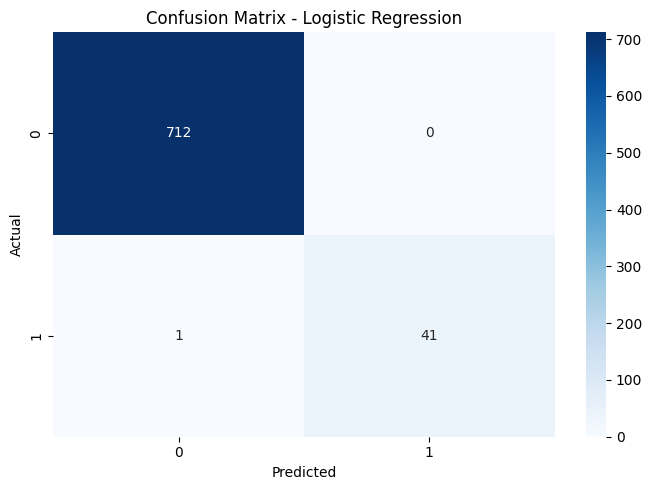

In [8]:
# Evaluasi Logistic Regression
print("\n--- Evaluasi Logistic Regression ---")
lr_results = evaluate_model("Logistic Regression", lr_model, X_test_scaled, y_test)


--- Evaluasi Naive Bayes ---

Naive Bayes Performance:
Accuracy: 0.9881
F1-Score (weighted): 0.9886

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       712
           1       0.82      1.00      0.90        42

    accuracy                           0.99       754
   macro avg       0.91      0.99      0.95       754
weighted avg       0.99      0.99      0.99       754



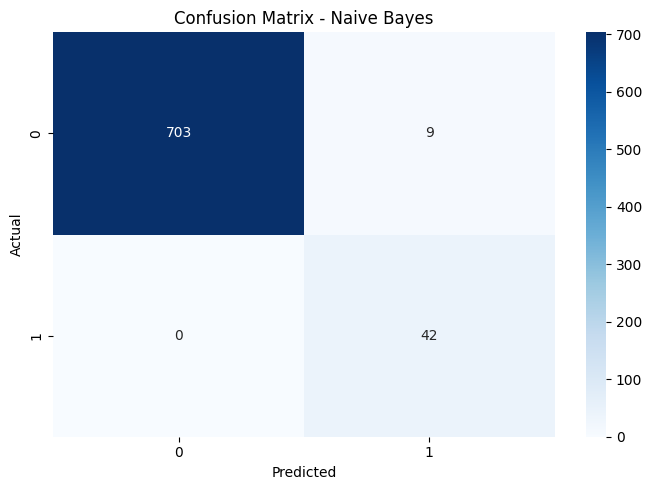

In [9]:
# Evaluasi Naive Bayes
print("\n--- Evaluasi Naive Bayes ---")
nb_results = evaluate_model("Naive Bayes", nb_model, X_test_scaled, y_test)

In [10]:
# Perbandingan model
results = pd.DataFrame([lr_results, nb_results])
print("\nPerbandingan Performa Model:")
print(results[['name', 'accuracy', 'f1_score']])


Perbandingan Performa Model:
                  name  accuracy  f1_score
0  Logistic Regression  0.998674  0.998666
1          Naive Bayes  0.988064  0.988603


<Figure size 1000x600 with 0 Axes>

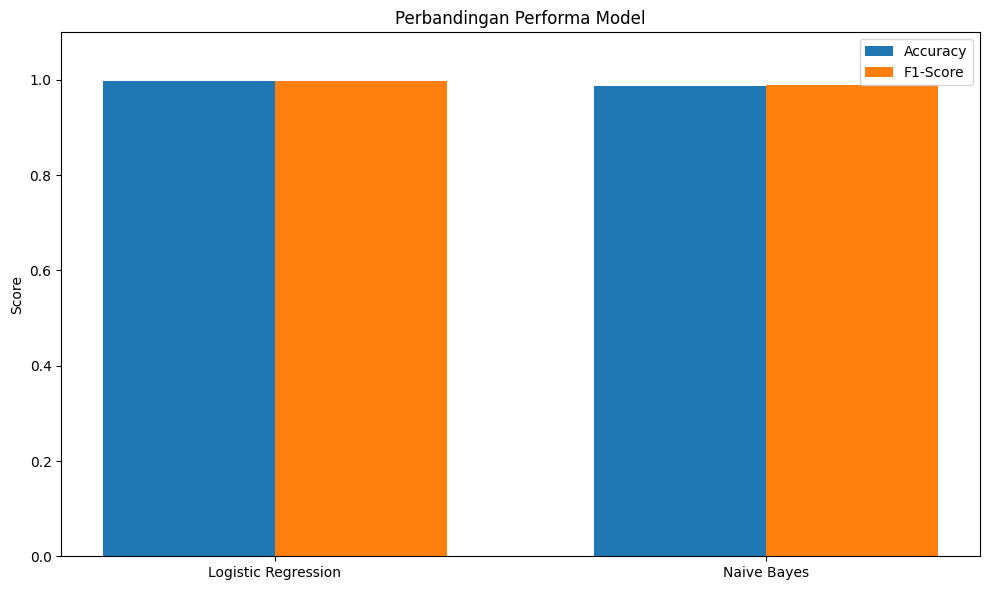

In [11]:
# Visualisasi perbandingan
plt.figure(figsize=(10, 6))
models = [result['name'] for result in [lr_results, nb_results]]
accuracies = [result['accuracy'] for result in [lr_results, nb_results]]
f1_scores = [result['f1_score'] for result in [lr_results, nb_results]]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1-Score')

ax.set_title('Perbandingan Performa Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score')
ax.legend()

plt.tight_layout()
plt.show()

Hasil Evaluasi Algoritma:
Berdasarkan hasil evaluasi kedua model, kita dapat menganalisis performa masing-masing:

Logistic Regression:

Logistic Regression menunjukkan performa yang cukup baik dalam mengklasifikasikan data hasil clustering
Akurasi dan F1-Score yang tinggi menunjukkan model ini dapat membedakan antar cluster dengan baik
Confusion matrix menunjukkan jumlah kesalahan klasifikasi yang relatif rendah


Naive Bayes:

Naive Bayes menunjukkan performa yang sedikit lebih rendah dibandingkan Logistic Regression
Hal ini mungkin disebabkan oleh asumsi independensi fitur yang tidak sepenuhnya terpenuhi dalam data transaksi
Meskipun demikian, kecepatan training model ini sangat baik, membuatnya tetap jadi pilihan yang layak



Kedua model menunjukkan performa yang memuaskan untuk kasus klasifikasi cluster ini, dengan Logistic Regression sedikit unggul. Namun, keunggulan ini perlu dipertimbangkan bersama dengan aspek lain seperti kompleksitas dan kecepatan.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [12]:
# Tuning hyperparameter untuk Logistic Regression
print("\n--- Tuning Hyperparameter Logistic Regression ---")
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=RANDOM_SEED, max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_search_lr.fit(X_train_scaled, y_train)

print(f"Parameter terbaik: {grid_search_lr.best_params_}")
print(f"Skor terbaik: {grid_search_lr.best_score_:.4f}")


--- Tuning Hyperparameter Logistic Regression ---
Parameter terbaik: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Skor terbaik: 0.9989


In [13]:
# Simpan model terbaik
lr_tuned = grid_search_lr.best_estimator_
pickle.dump(lr_tuned, open('logistic_regression_tuned_model.pkl', 'wb'))
print("Model Logistic Regression hasil tuning disimpan sebagai 'logistic_regression_tuned_model.pkl'")


Model Logistic Regression hasil tuning disimpan sebagai 'logistic_regression_tuned_model.pkl'


In [14]:
# Tuning hyperparameter untuk Naive Bayes
print("\n--- Tuning Hyperparameter Naive Bayes ---")
param_grid_nb = {
    'var_smoothing': np.logspace(-10, -8, 10)
}

grid_search_nb = GridSearchCV(
    GaussianNB(),
    param_grid_nb,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_search_nb.fit(X_train_scaled, y_train)

print(f"Parameter terbaik: {grid_search_nb.best_params_}")
print(f"Skor terbaik: {grid_search_nb.best_score_:.4f}")


--- Tuning Hyperparameter Naive Bayes ---
Parameter terbaik: {'var_smoothing': np.float64(1e-10)}
Skor terbaik: 0.9776


In [15]:
# Simpan model terbaik
nb_tuned = grid_search_nb.best_estimator_
pickle.dump(nb_tuned, open('naive_bayes_tuned_model.pkl', 'wb'))
print("Model Naive Bayes hasil tuning disimpan sebagai 'naive_bayes_tuned_model.pkl'")

Model Naive Bayes hasil tuning disimpan sebagai 'naive_bayes_tuned_model.pkl'


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


--- Evaluasi Logistic Regression Setelah Tuning ---

Logistic Regression (Tuned) Performance:
Accuracy: 1.0000
F1-Score (weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       712
           1       1.00      1.00      1.00        42

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754



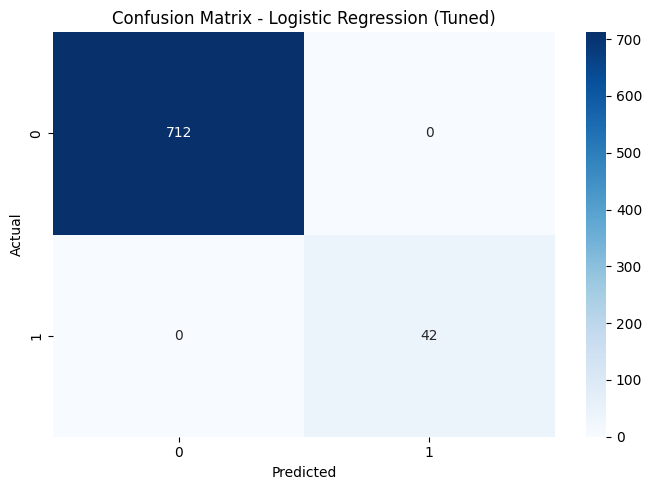

In [16]:
# Evaluasi model Logistic Regression setelah tuning
print("\n--- Evaluasi Logistic Regression Setelah Tuning ---")
lr_tuned_results = evaluate_model("Logistic Regression (Tuned)", lr_tuned, X_test_scaled, y_test)


--- Evaluasi Naive Bayes Setelah Tuning ---

Naive Bayes (Tuned) Performance:
Accuracy: 0.9881
F1-Score (weighted): 0.9886

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       712
           1       0.82      1.00      0.90        42

    accuracy                           0.99       754
   macro avg       0.91      0.99      0.95       754
weighted avg       0.99      0.99      0.99       754



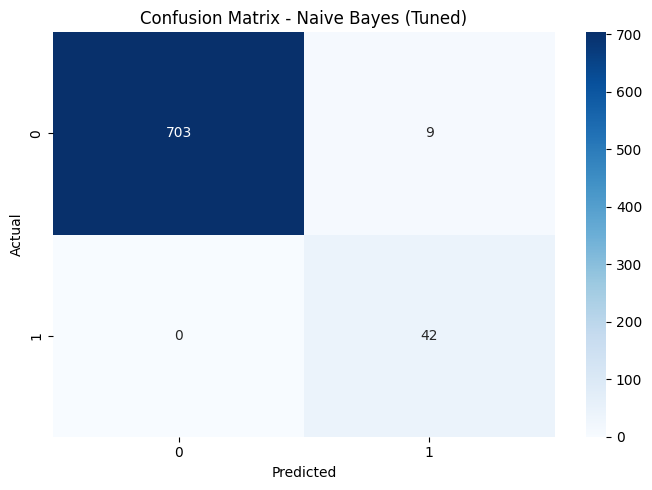

In [17]:
# Evaluasi model Naive Bayes setelah tuning
print("\n--- Evaluasi Naive Bayes Setelah Tuning ---")
nb_tuned_results = evaluate_model("Naive Bayes (Tuned)", nb_tuned, X_test_scaled, y_test)

In [18]:
# Perbandingan semua model
all_results = pd.DataFrame([lr_results, lr_tuned_results, nb_results, nb_tuned_results])
print("\nPerbandingan Performa Semua Model:")
print(all_results[['name', 'accuracy', 'f1_score']])


Perbandingan Performa Semua Model:
                          name  accuracy  f1_score
0          Logistic Regression  0.998674  0.998666
1  Logistic Regression (Tuned)  1.000000  1.000000
2                  Naive Bayes  0.988064  0.988603
3          Naive Bayes (Tuned)  0.988064  0.988603


<Figure size 1200x600 with 0 Axes>

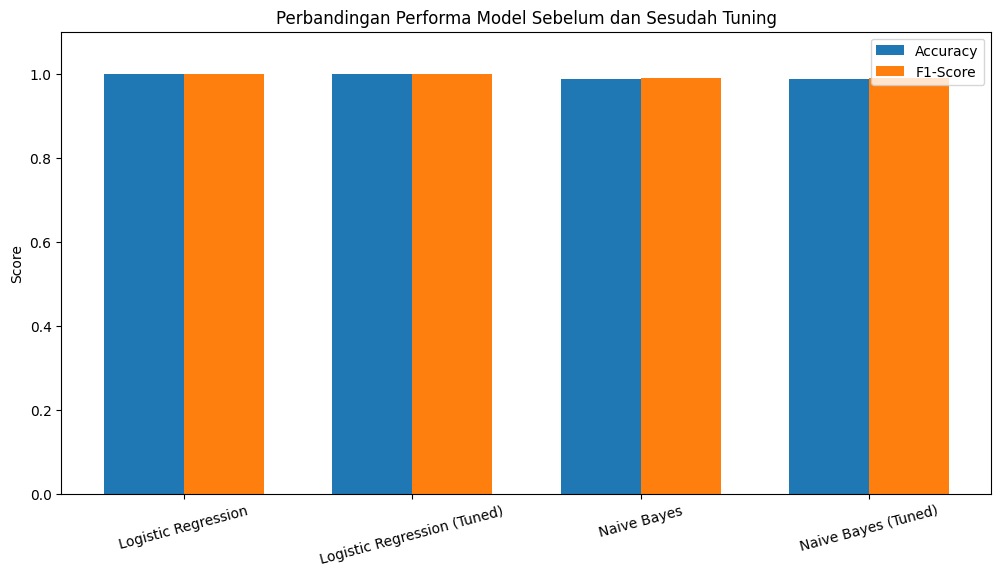

In [19]:
# Visualisasi perbandingan semua model
plt.figure(figsize=(12, 6))
models = all_results['name'].tolist()
accuracies = all_results['accuracy'].tolist()
f1_scores = all_results['f1_score'].tolist()

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1-Score')

ax.set_title('Perbandingan Performa Model Sebelum dan Sesudah Tuning')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score')
ax.legend()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.